## Ploting results from feature compression datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### BLAT Ostermeier 2014

In [ ]:
# Once we have all the fasta files and metadata we can extract the embeddings for each fasta.
python scripts/extract.py esm2_t30_150M_UR50D data/sumo1_human_data.fasta embeddings/sumo1_esm2_150M --repr_layers 30 --include bos mean per_tok


# Then we can compress the embeddings with the following command
dir_path = 'embeddings/BLAT_ECOLX_Ostermeier2014_esm2_150M/'
for i in ['mean', 'bos', 'max_pool', 'pca1', 'pca2', 'pca1-2', 'iDCT', 'rbf1', 'sigmoid1']:
    print(f'Compressing embeddings using {i}')
    embed = load_per_tok_embeds(dir_path, i)
    with open(f'embeddings/BLAT_ECOLX_Ostermeier2014_esm2_150M_compressed/BLAT_ECOLX_Ostermeier2014_esm2_150M_{i}.pkl', 'wb') as f:
        pickle.dump(embed, f)


# or one by one, but will take too long
python scripts/compressing_embeddings_v02.py  -e embeddings/sumo1_esm2_150M -c mean -l 30


# or by using the following command, see the script for more details
bash run_compression.sh


# with the compressed embedding we can run the regression model, see script for more details
python scripts/run_reg_Lasso.py -i embeddings/BLAT_ECOLX_Ostermeier2014_esm2_150M_compressed -m data/BLAT_ECOLX_Ostermeier2014_metadata_v02.csv -o results/BLAT_ECOLX_Ostermeier2014_esm2_150M_layer_30_compressed.csv

In [4]:
# the results will be as follow

results = pd.read_csv('results/BLAT_ECOLX_Ostermeier2014_esm2_150M_layer_30_compressed.csv', index_col=0)
results

,Layer,Model,Fold,R2_score_train,MAE_score_train,RMSE_score_train,R2_score_test,MAE_score_test,RMSE_score_test,rho_score_train,rho_score_test,nun_zero_coefs,Compression_methd
0,30,Lasso,1,0.524327,0.254750,0.312586,0.479329,0.270193,0.332624,0.764562,0.737631,194,pca2
1,30,Lasso,2,0.522986,0.255559,0.314251,0.490780,0.256704,0.317595,0.764961,0.722080,177,pca2
2,30,Lasso,3,0.524345,0.254501,0.312792,0.464802,0.271996,0.334833,0.764682,0.712715,186,pca2
3,30,Lasso,4,0.521677,0.255960,0.313840,0.493110,0.262222,0.324732,0.764232,0.734027,189,pca2
4,30,Lasso,5,0.523677,0.255027,0.313243,0.488411,0.269838,0.325410,0.764338,0.735876,189,pca2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,30,Lasso,6,0.603485,0.228637,0.286382,0.550407,0.239836,0.299675,0.806219,0.788100,202,pca1
6,30,Lasso,7,0.599704,0.229129,0.287300,0.580782,0.237981,0.293065,0.805959,0.794845,200,pca1
7,30,Lasso,8,0.601249,0.229097,0.285631,0.564650,0.240836,0.309392,0.806399,0.794586,200,pca1
8,30,Lasso,9,0.599083,0.230339,0.287684,0.585494,0.231481,0.289364,0.807938,0.782912,213,pca1


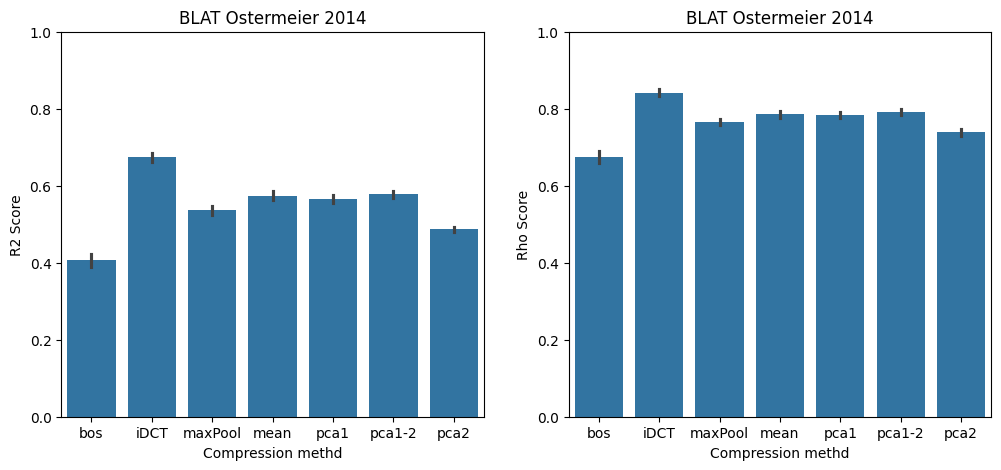

In [5]:
results.sort_values('Compression_methd', inplace=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(data=results, x='Compression_methd', y='R2_score_test', ax=ax[0])
ax[0].set_title('BLAT Ostermeier 2014')
ax[0].set_ylim(0, 1)
ax[0].set_ylabel('R2 Score')
ax[0].set_xlabel('Compression methd')

sns.barplot(data=results, x='Compression_methd', y='rho_score_test', ax=ax[1])
ax[1].set_title('BLAT Ostermeier 2014')
ax[1].set_ylim(0, 1)
ax[1].set_ylabel('Rho Score')
ax[1].set_xlabel('Compression methd')
plt.show()